In [1]:
import os
import random
import argparse
import numpy as np
# import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import torch

from models import DNN, RNN, LSTM, GRU, AttentionalLSTM, CNN
from utils import make_dirs, load_data, plot_full, data_loader, split_sequence_uni_step, split_sequence_multi_step
from utils import get_lr_scheduler, mean_percentage_error, mean_absolute_percentage_error, plot_pred_test

import warnings
warnings.filterwarnings("ignore")

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# Weights and Plots Path #
weights_path = './results/weights1/'
plots_path = './results/plits1/'
numpy_path = './results/numpy1/'
paths = [weights_path, plots_path, numpy_path]
for path in paths:
    make_dirs(path)

In [4]:
data_path = "/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Univariate-Time-Series-Prediction-using-Deep-Learning/data/"
# data = pd.read_csv(os.path.join(data_path, "energydata_complete.csv"), parse_dates=["date"])
data = load_data(data_path+"energydata_complete.csv")[['Appliances']]

data = data.copy()
data

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


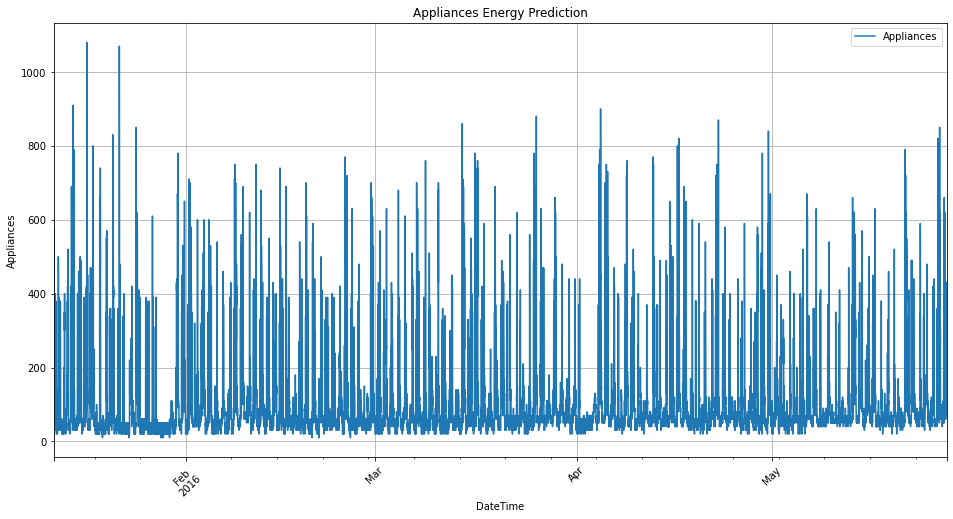

In [5]:
#plot
plot_full(plots_path,data,'Appliances')

In [6]:
data.shape

(19735, 1)

In [7]:
scaler = MinMaxScaler()
data['Appliances'] = scaler.fit_transform(data)

In [8]:
#split the datasets
copied_data = data.copy().values
copied_data

array([[0.04672897],
       [0.04672897],
       [0.03738318],
       ...,
       [0.24299065],
       [0.38317757],
       [0.39252336]])

In [9]:
n_steps = 5
X, y = split_sequence_uni_step(copied_data,n_steps)
step = "SingleStep"

In [10]:
train_split =0.8
test_split = 0.2
batch_size =128
train_loader, val_loader, test_loader = data_loader(X, y, train_split,test_split,batch_size)

In [11]:
#lists
train_losses, val_losses = list(), list()
val_maes, val_mses, val_rmses, val_mapes, val_mpes, val_r2s = list(), list(), list(), list(), list(), list()
test_maes, test_mses, test_rmses, test_mapes, test_mpes, test_r2s = list(), list(), list(), list(), list(), list()
pred_tests, labels = list(), list()

# Constants #
best_val_loss = 100
best_val_improv = 0

In [12]:
model = 'dnn'
seq_length = 5
hidden_size = 10
output_size = 1
model = DNN(seq_length, hidden_size, output_size).to(device)

#loss Function
criterion = torch.nn.MSELoss()

#Optimizer
lr = 1e-3
lr_scheduler = 'cosine' #['step', 'plateau', 'cosine'])
optim = torch.optim.Adam(model.parameters(), lr, betas=(0.5,0.999))
optim_scheduler = get_lr_scheduler(lr_scheduler, optim)

In [15]:
#Train and validation
num_epochs = 10
print("Training {} using {} started with total epoch of {}.".format(model.__class__.__name__, step, num_epochs))

Training DNN using SingleStep started with total epoch of 10.


In [17]:
for epoch in range(num_epochs):
    for i, (data,label) in enumerate(train_loader):
        #print(epoch,data,label)
        
        #prepare data
        data = data.to(device, dtype=torch.float32)
        label = label.to(device, dtype=torch.float32)
        print(data.shape, label.shape)
        
        #forward data
        pred = model(data)
        
        #calculate loss
        train_loss = criterion(pred, label)
        
        #initizlize optimizer, back propagation and updata
        optim.zero_grad()
        
        

torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size

torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size

torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size

torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size([128, 5, 1]) torch.Size([128, 1])
torch.Size